In [21]:
import xrayutilities as xu
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import filedialog
import os
import xrdtools #easy way for reading XRDML
%matplotlib notebook
#root = tk.Tk()
#root.withdraw()
#filepath = filedialog.askopenfilename()
#filename = os.path.basename(filepath)
#fpath = r'C:\Users\oliver\OneDrive - UNSW\Samples_Ralph_Dan\DS16161-180\DS16174_BFO-STO_13kpulse'
#fname = '\DS16174_XRR_Quick.xrdml'
#fxrd = r'C:\Users\olive\UNSW\Daniel Sando - Samples_Ralph_Dan\2017\DS17111_BFO-STO_110_fresh_polished\DS17111_XRR.xrdml'
#pt = fxrd.rfind('\\' )
#sample_name = fxrd[pt+1:pt+8]
#print(sample_name)
root = tk.Tk()
root.withdraw()
fpath = filedialog.askopenfilename()
fname = os.path.basename(fpath)                


data = xrdtools.read_xrdml(fpath)


om = data['Omega']
tt = data['2Theta']
intensity = data['data']


#file = r'C:\Users\olive\OneDrive - UNSW\Experiments 2019\Xrays\VG180301\VG180301_rockingCurve_alignment.ras'



In [6]:
print(fpath + fname)
%qtconsole


C:/Users/oliver/OneDrive - UNSW/Samples_Ralph_Dan/DS16161-180/DS16174_BFO-STO_13kpulse/DS16174_RC_BFO_002.xrdmlDS16174_RC_BFO_002.xrdml


<IPython.core.display.Javascript object>


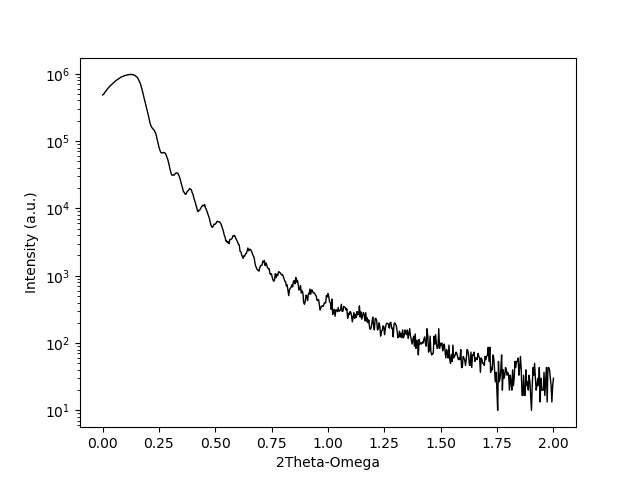

In [26]:

#plt.style.use('lines')
fig, ax = plt.subplots()
#fig.canvas.layout.width = '7in'
#fig.canvas.layout.height= '5in'
ax.plot(om, intensity, label='Data', color='black', linewidth=1)
#ax.set_xlim(55,82)
ax.set_xlabel( data['scanAxis'])
ax.set_ylabel( 'Intensity (a.u.)')
ax.set_yscale('log')
#ax.set_yticklabels([])
#fig.tight_layout()
#plt.savefig(fpath + fname[:-6] + '.svg', transparent=True)

In [18]:
params, sd_params, itlim = xu.math.fit.peak_fit(om, intensity, iparams=[], maxit=3000, peaktype='Gauss')

ax.plot(om, xu.math.Gauss1d(om, *params), label='Gauss fit')
ax.legend(loc='upper left')
fwhm = xu.math.fit.fwhm_exp(om, xu.math.Gauss1d(om, *params))
print('FWHM = ' + str(fwhm))
ax.text(21.6,10000, 'FWHM = '+ "{:.2f}".format(fwhm) + '$^{\\circ}$')
#plt.savefig( filepath[:-4] + '.svg', transparent=True)

FWHM = 0.13161222618122892


Text(21.6, 10000, 'FWHM = 0.13$^{\\circ}$')

In [20]:
plt.savefig( fpath[:-5] + '.svg', transparent=True)

<IPython.core.display.Javascript object>


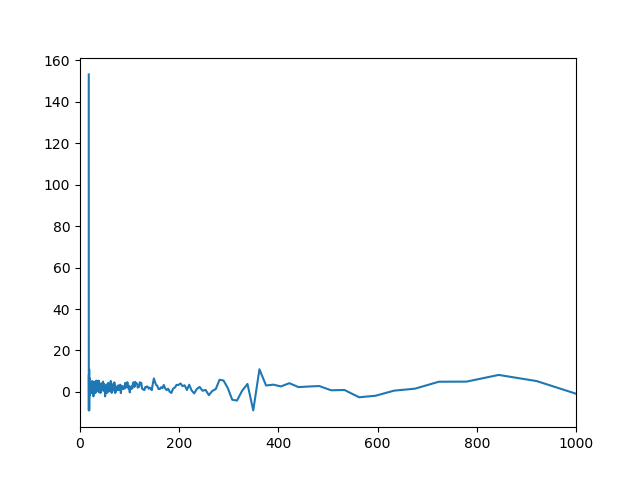

C:\Users\oliver\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 1000)

In [29]:
from scipy.fft import fft

N = len(intensity)
T = tt[5] - tt[4]

logY = np.log10(intensity)
fftY = fft(logY)
T = 1/len(intensity)
Q = 4*np.pi/1.54 * np.sin(np.radians(tt/2))
fig, ax2 = plt.subplots()

ax2.plot(2*np.pi/Q, fftY)
ax2.set_xlim(0,1000)

In [3]:
plt.plot(Q, intensity, label='DS18002', color='black')
plt.xlabel( '2Theta (degrees)')
plt.ylabel( 'Intensity (a.u.)')
plt.yscale('log')

#plt.xlim(0.15,0.22)


NameError: name 'Q' is not defined

In [7]:
Q = 4 * np.pi/1.54 * np.sin(np.radians(tt/2))